<a href="https://colab.research.google.com/github/nanxingw/VGG16_tid2013/blob/main/cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 检查 scipy 是否已安装
import scipy
print(scipy.__version__)
from google.colab import drive
drive.mount('/content/drive')
from scipy.io import loadmat
# 加载MATLAB文件
filename = '/content/drive/MyDrive/archive/'

1.11.4
Mounted at /content/drive


Distorted Image - Size: (512, 384) Mode: RGB
Reference Image - Size: (512, 384) Mode: RGB


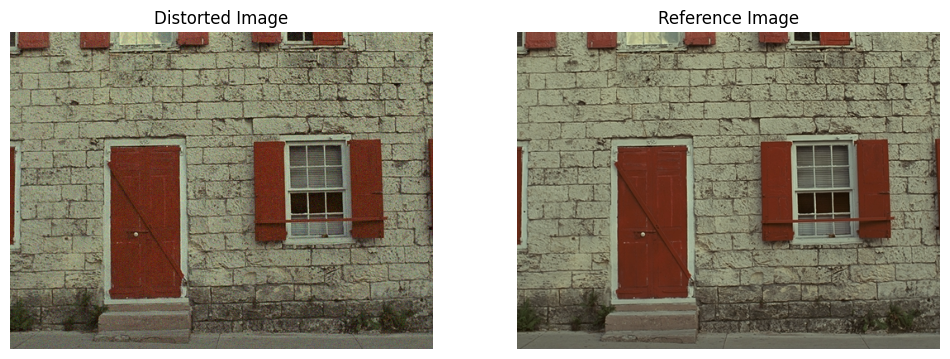

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 文件夹路径
distorted_images_dir = filename+'tid2013/distorted_images'
reference_images_dir = filename+'tid2013/reference_images'


# 假设你想查找特定图像的小写名称
distorted_image_name = 'i01_01_2.bmp'
reference_image_name = 'i01.BMP'

# 构建完整的文件路径
distorted_image_path = os.path.join(distorted_images_dir, distorted_image_name)
reference_image_path = os.path.join(reference_images_dir, reference_image_name)

# 加载图像
distorted_image = Image.open(distorted_image_path)
reference_image = Image.open(reference_image_path)

# 打印图像详情
print("Distorted Image - Size:", distorted_image.size, "Mode:", distorted_image.mode)
print("Reference Image - Size:", reference_image.size, "Mode:", reference_image.mode)

# 创建图像显示图
plt.figure(figsize=(12, 6))

# 显示失真图像
plt.subplot(1, 2, 1)
plt.imshow(distorted_image)
plt.title('Distorted Image')
plt.axis('off')

# 显示参考图像
plt.subplot(1, 2, 2)
plt.imshow(reference_image)
plt.title('Reference Image')
plt.axis('off')

plt.show()



In [3]:
mos_file_path = filename+'tid2013/mos.txt'
import numpy as np

with open(mos_file_path, 'r') as file:
    mos_scores = file.readlines()
    mos_scores = [float(score.strip()) for score in mos_scores]  # 转换为浮点数列表

labels = np.array(mos_scores)
# print(labels.shape())
print(len(labels))

3000


In [4]:
# import numpy as np
# import os
# mos_file_path = filename+'tid2013/mos.txt'

# # 读取MOS分数
# with open(mos_file_path, 'r') as file:
#     mos_scores = file.readlines()
#     mos_scores = [float(score.strip()) for score in mos_scores]  # 转换为浮点数列表

# # 获取失真图像文件列表并排序以确保与MOS分数对应
# distorted_image_files = sorted(os.listdir(distorted_images_dir))

# # 初始化数据集列表
# images = []
# labels = []

# # 遍历每个文件和对应的MOS分数
# for file_name in enumerate(distorted_image_files):
#     # 获取文件名不含扩展名部分
#     base_name = os.path.splitext(file_name)[0]

#     # 构建完整的文件路径
#     distorted_image_path = os.path.join(distorted_images_dir, file_name)
#     reference_image_path = os.path.join(reference_images_dir, f"{base_name.split('_')[0]}.BMP")

#     # 确保参考图像存在
#     if not os.path.exists(reference_image_path):
#         continue

#     # 加载图像
#     distorted_image = Image.open(distorted_image_path)
#     reference_image = Image.open(reference_image_path)

#     # 拼接图像
#     combined_image = Image.new('RGB', (distorted_image.width, distorted_image.height * 2))
#     combined_image.paste(distorted_image, (0, 0))
#     combined_image.paste(reference_image, (0, distorted_image.height))

#     # 将图像和对应的MOS分数添加到列表中
#     images.append(np.array(combined_image))

# # 转换列表为numpy数组以便于处理
# images = np.array(images)
# MOS分数和文件名列表的文件路径
mos_with_names_path = filename + 'tid2013/mos_with_names.txt'

# 读取MOS分数和文件名
with open(mos_with_names_path, 'r') as file:
    lines = file.readlines()
    image_files = [line.strip().split()[-1] for line in lines]  # 提取文件名
    mos_scores = [float(line.strip().split()[0]) for line in lines]  # 提取分数

# 初始化数据集列表
images = []
labels = []

# 遍历文件名和对应的MOS分数
for file_name, mos_score in zip(image_files, mos_scores):
    # 构建完整的文件路径
    distorted_image_path = os.path.join(distorted_images_dir, file_name)

    # 检查文件是否存在
    if os.path.exists(distorted_image_path):
        # 加载图像
        distorted_image = Image.open(distorted_image_path)
        # 将图像转换为数组并添加到列表中
        images.append(np.array(distorted_image))
        labels.append(mos_score)
    else:
        print(f"File not found: {distorted_image_path}")

# 转换列表为numpy数组以便于处理
images = np.array(images)
labels = np.array(labels)

# # 保存数据集为.npy文件
# np.save('distorted_images_dataset.npy', images)
# np.save('labels_dataset.npy', labels)

# 输出图像数据集的维度信息和标签数组的长度
print(images.shape)
print(len(labels))


File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I01_01_1.bmp
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I01_11_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I01_13_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I02_11_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I02_13_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I03_11_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I03_13_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I04_11_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I04_13_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I05_11_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_images/I05_13_1.BMP
File not found: /content/drive/MyDrive/archive/tid2013/distorted_

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# 加载数据集
# images = np.load('distorted_images_dataset.npy')
# labels = np.load('labels_dataset.npy')

# 归一化图像数据
images = images.astype('float32') / 255.0

# 划分数据集
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# 加载预训练的VGG16模型
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(384, 512, 3))
base_model.trainable = False  # 冻结模型，不训练

# 构建新的模型
x = Flatten()(base_model.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='linear')(x)  # 输出层为线性激活，预测MOS
model = Model(inputs=base_model.input, outputs=output)

# 编译模型
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mean_squared_error')

# 训练模型
history = model.fit(train_images, train_labels, epochs=20, batch_size=16,
                    validation_data=(test_images, test_labels))

# 评估模型
test_loss = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)

# 可以保存模型以供将来使用
model.save('vgg_based_mos_predictor.h5')


58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/20
148/148 [==============================] - 30s 154ms/step - loss: 2.0163 - val_loss: 0.6035
Epoch 2/20
148/148 [==============================] - 15s 100ms/step - loss: 0.7421 - val_loss: 0.4551
Epoch 3/20
148/148 [==============================] - 15s 100ms/step - loss: 0.5942 - val_loss: 0.3839
Epoch 4/20
148/148 [==============================] - 15s 100ms/step - loss: 0.5526 - val_loss: 0.3200
Epoch 5/20
148/148 [==============================] - 15s 100ms/step - loss: 0.4863 - val_loss: 0.4150
Epoch 6/20
148/148 [==============================] - 15s 100ms/step - loss: 0.4242 - val_loss: 0.2946
Epoch 7/20
148/148 [==============================] - 15s 100ms/step - loss: 0.4213 - val_loss: 0.2602
Epoch 8/20
148/148 [==============================] - 15s 100ms/step - loss: 0.4098 - val_loss: 0.2658
Epoch 9/20
148/148 [==============================] - 15s 100ms/step - loss: 0.3687 - val_loss: 0.2361
Epoch 10

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


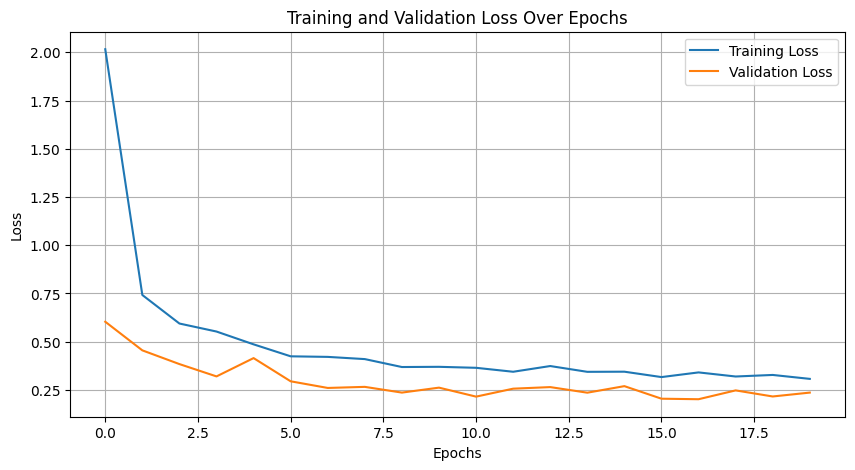

In [6]:
import matplotlib.pyplot as plt

# 获取训练和验证损失历史
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 设置绘图
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

# 加载保存的模型
model = load_model('vgg_based_mos_predictor.h5')

# 设置图像文件路径
reference_images_dir = filename+'tid2013/reference_images'
distorted_images_dir = filename+'tid2013/distorted_images'
image_path = distorted_images_dir + '/I25_13_1.bmp'

# 加载并预处理图像
image = Image.open(image_path)
image = np.array(image) / 255.0   # 归一化图像数据
image = np.expand_dims(image, axis=0)  # 增加批次维度

# 使用模型进行预测
predicted_mos = model.predict(image)[0][0]

# 打印预测的MOS
print(f"Predicted MOS: {predicted_mos:.2f}")

1/1 [==============================] - 1s 1s/step
Predicted MOS: 5.60


In [8]:

import numpy as np
import os

# 设置mos_with_names.txt的路径
mos_with_names_path = filename + 'tid2013/mos_with_names.txt'

# 创建一个字典来存储文件名和对应的MOS值
mos_scores_dict = {}
with open(mos_with_names_path, 'r') as file:
    for line in file:
        parts = line.strip().split()
        mos_scores_dict[parts[1].lower()] = float(parts[0])  # 确保文件名是小写

# 列出需要计算MOS的文件名
image_files = [
    "i01_01_1.bmp", "i01_11_1.bmp", "i01_13_1.bmp",
    "i02_11_1.bmp", "i02_13_1.bmp", "i03_11_1.bmp",
    "i03_13_1.bmp", "i04_11_1.bmp", "i04_13_1.bmp",
    "i05_11_1.bmp", "i05_13_1.bmp", "i06_11_1.bmp",
    "i06_13_1.bmp", "i07_11_1.bmp", "i07_13_1.bmp",
    "i08_11_1.bmp", "i08_13_1.bmp", "i09_11_1.bmp",
    "i09_13_1.bmp", "i10_11_1.bmp", "i10_13_1.bmp",
    "i11_11_1.bmp", "i11_13_1.bmp", "i12_11_1.bmp",
    "i12_13_1.bmp", "i13_11_1.bmp", "i13_13_1.bmp",
    "i14_11_1.bmp", "i14_13_1.bmp", "i15_11_1.bmp",
    "i15_13_1.bmp", "i16_11_1.bmp", "i16_13_1.bmp",
    "i17_11_1.bmp", "i17_13_1.bmp", "i18_11_1.bmp",
    "i18_13_1.bmp", "i19_11_1.bmp", "i19_13_1.bmp",
    "i20_11_1.bmp", "i20_13_1.bmp", "i21_11_1.bmp",
    "i21_13_1.bmp", "i22_11_1.bmp", "i22_13_1.bmp",
    "i23_11_1.bmp", "i23_13_1.bmp", "i24_11_1.bmp",
    "i24_13_1.bmp", "i25_11_1.bmp", "i25_13_1.bmp"
]

# 创建数组来存储真实的MOS值
truth = []

# 从字典中获取MOS值
for file_name in image_files:
    mos_value = mos_scores_dict.get(file_name.lower())  # 使用小写以匹配字典键
    if mos_value is not None:
        truth.append(mos_value)
    else:
        print(f"MOS value for {file_name} not found.")

# 将truth列表转换为NumPy数组
truth = np.array(truth)

# 输出truth数组和长度
print(truth)
print(len(truth))


[5.51429 5.91429 5.45946 5.91667 4.47222 5.36842 5.12821 5.3     4.66667
 5.7561  5.46341 5.54054 4.67568 5.48837 4.5814  6.      5.78125 5.90625
 4.51515 5.15385 5.78947 5.86111 4.08333 5.40541 5.37838 5.32558 5.4186
 5.97297 5.02703 5.84444 4.84091 5.875   4.6     5.5641  5.15    5.80488
 4.14634 5.52632 4.67568 5.57895 5.15385 6.12195 4.45238 5.35897 5.25641
 5.25714 4.54286 5.4     4.05882 6.08571 4.82857]
51


In [9]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.models import load_model

# 加载模型
model = load_model('vgg_based_mos_predictor.h5')

# 设置失真图像的文件夹路径
distorted_images_dir = filename + 'tid2013/distorted_images'

# 列出需要计算MOS的文件名
image_files = [
    "i01_01_1.bmp", "I01_11_1.bmp", "I01_13_1.bmp",
    "I02_11_1.bmp", "I02_13_1.bmp", "I03_11_1.bmp",
    "I03_13_1.bmp", "I04_11_1.bmp", "I04_13_1.bmp",
    "I05_11_1.bmp", "I05_13_1.bmp", "I06_11_1.bmp",
    "I06_13_1.bmp", "I07_11_1.bmp", "I07_13_1.bmp",
    "I08_11_1.bmp", "I08_13_1.bmp", "I09_11_1.bmp",
    "I09_13_1.bmp", "I10_11_1.bmp", "I10_13_1.bmp",
    "I11_11_1.bmp", "I11_13_1.bmp", "I12_11_1.bmp",
    "I12_13_1.bmp", "I13_11_1.bmp", "I13_13_1.bmp",
    "I14_11_1.bmp", "I14_13_1.bmp", "I15_11_1.bmp",
    "I15_13_1.bmp", "I16_11_1.bmp", "I16_13_1.bmp",
    "I17_11_1.bmp", "I17_13_1.bmp", "I18_11_1.bmp",
    "I18_13_1.bmp", "I19_11_1.bmp", "I19_13_1.bmp",
    "I20_11_1.bmp", "I20_13_1.bmp", "I21_11_1.bmp",
    "I21_13_1.bmp", "I22_11_1.bmp", "I22_13_1.bmp",
    "I23_11_1.bmp", "I23_13_1.bmp", "I24_11_1.bmp",
    "I24_13_1.bmp", "I25_11_1.bmp", "I25_13_1.bmp"

]

# 初始化预测结果数组
pre = []

# 加载和预测每张图像
for file_name in image_files:
    image_path = os.path.join(distorted_images_dir, file_name)
    if os.path.exists(image_path):
        try:
            # 加载图像
            image = Image.open(image_path)
            # 调整大小并归一化
            image = np.array(image) / 255.0
            image = np.expand_dims(image, axis=0)

            # 使用模型进行预测
            predicted_mos = model.predict(image)[0][0]
            pre.append(predicted_mos)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
    else:
        print(f"File not found: {image_path}")
        pre.append(None)  # 如果文件不存在，添加None作为占位符

# 将pre列表转换为NumPy数组
pre = np.array(pre)

# 输出pre数组和长度
print(pre)
print(len(pre))

1/1 [==============================] - 0s 21ms/step
[5.2767634 5.4168887 5.3238616 5.9917865 5.2669935 5.342483  5.0527973
 5.2647023 5.240296  5.7900434 5.268562  5.831551  5.258456  5.6956797
 5.0616336 5.453282  5.1449914 5.5418897 5.2210927 5.5522704 5.7348394
 5.748963  5.374717  5.5395064 5.529448  5.398954  5.154726  5.6927023
 5.386882  5.4930325 5.315239  5.6872773 5.1008797 5.689571  5.2985425
 5.429404  4.695721  5.356734  4.962842  5.9620843 5.850948  5.423047
 4.758428  5.904077  5.4349456 5.099062  5.0999    6.0869813 5.5546217
 6.0784564 5.5983906]
51


In [10]:
valid_indices = [i for i, (p, t) in enumerate(zip(pre, truth)) if p is not None and t is not None]
filtered_pre = np.array([pre[i] for i in valid_indices])
filtered_truth = np.array([truth[i] for i in valid_indices])

# 计算MSE
mse = np.mean((filtered_pre - filtered_truth) ** 2)
print("pre:")
print(pre)
print("truth:")
print(truth)
# 输出MSE
print(f"Mean Squared Error: {mse}")

pre:
[5.2767634 5.4168887 5.3238616 5.9917865 5.2669935 5.342483  5.0527973
 5.2647023 5.240296  5.7900434 5.268562  5.831551  5.258456  5.6956797
 5.0616336 5.453282  5.1449914 5.5418897 5.2210927 5.5522704 5.7348394
 5.748963  5.374717  5.5395064 5.529448  5.398954  5.154726  5.6927023
 5.386882  5.4930325 5.315239  5.6872773 5.1008797 5.689571  5.2985425
 5.429404  4.695721  5.356734  4.962842  5.9620843 5.850948  5.423047
 4.758428  5.904077  5.4349456 5.099062  5.0999    6.0869813 5.5546217
 6.0784564 5.5983906]
truth:
[5.51429 5.91429 5.45946 5.91667 4.47222 5.36842 5.12821 5.3     4.66667
 5.7561  5.46341 5.54054 4.67568 5.48837 4.5814  6.      5.78125 5.90625
 4.51515 5.15385 5.78947 5.86111 4.08333 5.40541 5.37838 5.32558 5.4186
 5.97297 5.02703 5.84444 4.84091 5.875   4.6     5.5641  5.15    5.80488
 4.14634 5.52632 4.67568 5.57895 5.15385 6.12195 4.45238 5.35897 5.25641
 5.25714 4.54286 5.4     4.05882 6.08571 4.82857]
Mean Squared Error: 0.2341475514160698


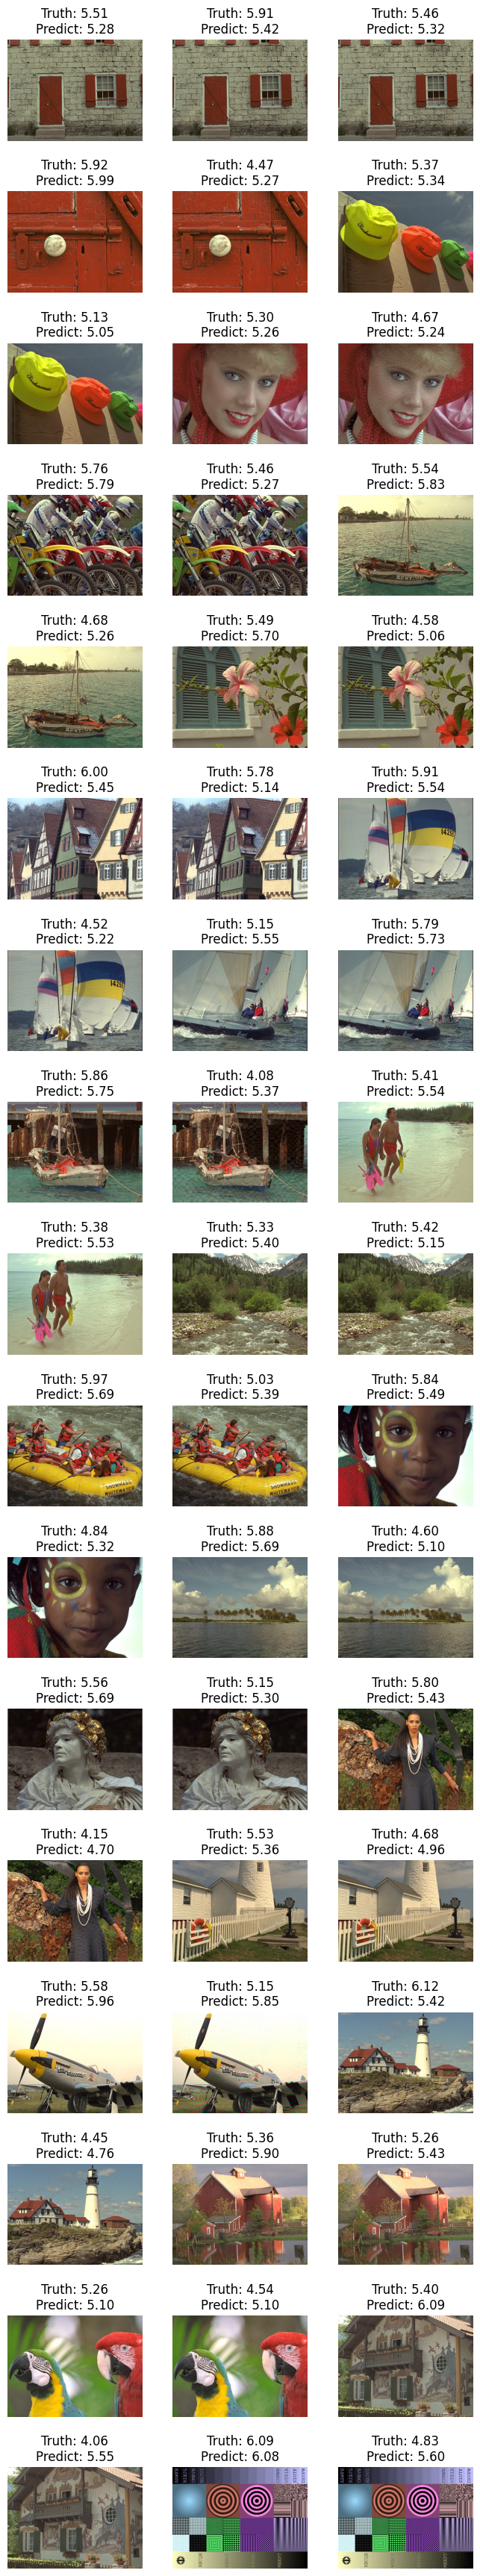

In [14]:
rows = 17
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 44))  # 调整图像大小
axes = axes.ravel()

for idx, file_name in enumerate(image_files):
    if idx >= len(filtered_pre):  # 防止越界
        break
    # 加载图像
    img_path = os.path.join(distorted_images_dir, file_name)
    image = Image.open(img_path)
    axes[idx].imshow(image)
    axes[idx].set_title(f'Truth: {filtered_truth[idx]:.2f}\nPredict: {filtered_pre[idx]:.2f}')
    axes[idx].axis('off')

# 调整每个子图之间的间隔
plt.subplots_adjust(hspace=0.5, wspace=-0.8)

# 显示图像
plt.show()